In [1]:
# cnn_basic
# conv2d layer
# max pooling layer
# toy image 사용

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

[[[[1.]
   [2.]
   [3.]]

  [[4.]
   [5.]
   [6.]]

  [[7.]
   [8.]
   [9.]]]]
(1, 3, 3, 1)


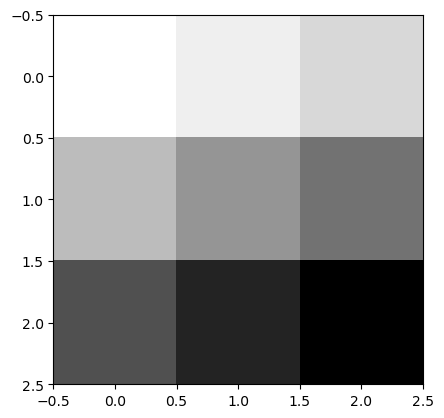

In [3]:
# 입력 이미지
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]]] , dtype=np.float32)
print(image)
print(image.shape)  # (1, 3, 3, 1), Rank=4, (4차원)
plt.imshow(image.reshape(3,3),cmap='Greys')
plt.show()